In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from sklearn import svm #svm导入
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ChangedBehaviorWarning
from sklearn import datasets

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
warnings.filterwarnings('ignore', category=ChangedBehaviorWarning)

In [10]:
## 读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
# iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
# path = './datas/iris.data'  # 数据文件路径
# data = pd.read_csv(path, header=None)
# x, y = data[list(range(4))], data[4]
# y = pd.Categorical(y).codes #把文本数据进行编码，比如a b c编码为 0 1 2; 可以通过pd.Categorical(y).categories获取index对应的原始值
# x = x[[0, 1]] # 获取第一列和第二列
iris = datasets.load_iris()  
x = iris.data[:,0:2]
y = iris.target

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.8)

d:\python\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# svm.SVC API说明：
# 功能：使用SVM分类器进行模型构建
# 参数说明：
# C: 误差项的惩罚系数，默认为1.0；一般为大于0的一个数字，C越大表示在训练过程中对于总误差的关注度越高，也就是说当C越大的时候，对于训练集的表现会越好，
# 但是有可能引发过度拟合的问题(overfiting)
# kernel：指定SVM内部函数的类型，可选值：linear、poly、rbf、sigmoid、precomputed(基本不用，有前提要求，要求特征属性数目和样本数目一样)；默认是rbf；
# degree：当使用多项式函数作为svm内部的函数的时候，给定多项式的项数，默认为3
# gamma：当SVM内部使用poly、rbf、sigmoid的时候，核函数的系数值，当默认值为auto的时候，实际系数为1/n_features
# coef0: 当核函数为poly或者sigmoid的时候，给定的独立系数，默认为0
# probability：是否启用概率估计，默认不启动，不太建议启动
# shrinking：是否开启收缩启发式计算，默认为True
# tol: 模型构建收敛参数，当模型的的误差变化率小于该值的时候，结束模型构建过程，默认值:1e-3
# cache_size：在模型构建过程中，缓存数据的最大内存大小，默认为空，单位MB
# class_weight：给定各个类别的权重，默认为空
# max_iter：最大迭代次数，默认-1表示不限制
# decision_function_shape: 决策函数，可选值：ovo和ovr，默认为None；推荐使用ovr；（1.7以上版本才有）
# '''

In [82]:
## 数据SVM分类器构建
clf = svm.SVC(C=1,kernel='rbf',gamma=0.1)
#gamma值越大，训练集的拟合就越好，但是会造成过拟合，导致测试集拟合变差
#gamma值越小，模型的泛化能力越好，训练集和测试集的拟合相近，但是会导致训练集出现欠拟合问题，
#从而，准确率变低，导致测试集准确率也变低。
## 模型训练
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
## 计算模型的准确率/精度
print (clf.score(x_train, y_train)) 
print ('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print (clf.score(x_test, y_test))
print ('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

## 计算决策函数的结构值以及预测值(decision_function计算的是样本x到各个分割平面的距离<也就是决策函数的值>)
print ('decision_function:\n', clf.decision_function(x_train))
print ('\npredict:\n', clf.predict(x_train))
print(y_train==clf.predict(x_train))

0.85
训练集准确率： 0.85
0.7333333333333333
测试集准确率： 0.7333333333333333
decision_function:
 [[-0.25039727  1.0886331   2.16176417]
 [ 1.03478736  2.11650098 -0.15128834]
 [ 2.23214438  1.00598335 -0.23812773]
 [-0.19163546  2.1175139   1.07412155]
 [-0.32152579  1.14496276  2.17656303]
 [ 1.02173467  2.16988825 -0.19162293]
 [ 2.14580325  0.95677746 -0.10258071]
 [-0.23566638  2.17796366  1.05770273]
 [-0.13008471  2.12075927  1.00932543]
 [-0.19844194  2.1995431   0.99889884]
 [-0.36343522  1.08701831  2.27641692]
 [ 2.30535715  1.04393285 -0.34929   ]
 [-0.35915878  1.06384614  2.29531264]
 [ 2.29333629  0.99860275 -0.29193904]
 [ 2.21795456  0.97111601 -0.18907056]
 [ 0.92054508  2.2724345  -0.19297958]
 [-0.2997012   1.10328323  2.19641797]
 [-0.2730624   1.03890272  2.23415968]
 [-0.33839217  2.26132199  1.07707018]
 [-0.44273262  1.17653689  2.26619573]
 [-0.15877661  2.21746358  0.94131303]
 [-0.44724083  1.02472152  2.42251931]
 [-0.17202518  1.05287918  2.119146  ]
 [-0.14988387  2.23

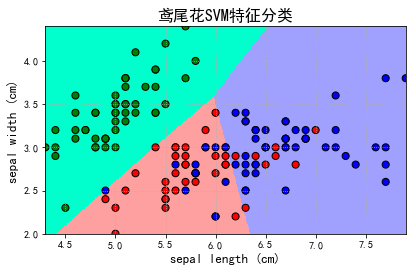

In [36]:
# 画图
N = 500
x1_min, x2_min = x[:,0].min(),x[:,1].min()
x1_max, x2_max = x[:,0].max(),x[:,1].max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点

grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点


grid_hat = clf.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
## 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
# ## 所以样本点
plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
# ## 测试数据集
plt.scatter(x_test[:,0], x_test[:,1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
# ## lable列表
plt.xlabel(iris.feature_names[0], fontsize=13)
plt.ylabel(iris.feature_names[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()